# Observations
1) Not all all mice hit the check points meaning that some might not have survived the medication or had adverse events that caused them to be terminated
2) Ramicane and Capomulin were the best performing drugs with a lower tumor volume at the last time point than the other two drugs
3) The one mouse that was removed from the data was the reason that the male and female population was not a perfect 50/50 split.
4) As the weight of the mouse increased so did the tumor volume.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [51]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Uesed groupby to count the number of tests at a timepoint and then sorted
# by value to find which mouse was not 1.
test = combined_df.groupby(["Mouse ID", "Timepoint"])["Timepoint"].count()
test.sort_values(ascending=False)


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Name: Timepoint, Length: 1888, dtype: int64

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
# Collects and save duplicate mouse data to dub_df dataframe
dub_df = combined_df.set_index('Mouse ID')
dub_df = dub_df.loc['g989']
dub_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.set_index('Mouse ID')
clean_df = clean_df.drop('g989')
clean_df = clean_df.reset_index()
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [55]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
new_mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
new_median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
new_var = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
new_std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
new_sem = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean Tumor Volume": new_mean,
                                "Median Tumor Volume": new_median,
                                "Tumor Volume Variance": new_var,
                                "Tumor Volume Standard Devation": new_std,
                                "Tumor Volume SEM": new_sem})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Devation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(Mean='mean',
                                                             Median='median',
                                                             Variance='var',
                                                             Standard='std',
                                                             Sem='sem')


,Mean,Median,Variance,Standard,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

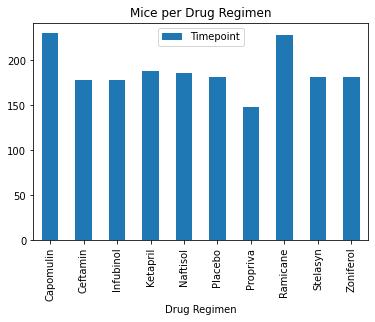

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tot_tested = pd.DataFrame(clean_df.groupby('Drug Regimen').count()).reset_index()
x_axis = tot_tested['Drug Regimen']
y_axis = tot_tested['Timepoint']
tot_tested.plot.bar('Drug Regimen','Timepoint', title='Mice per Drug Regimen')


<BarContainer object of 10 artists>

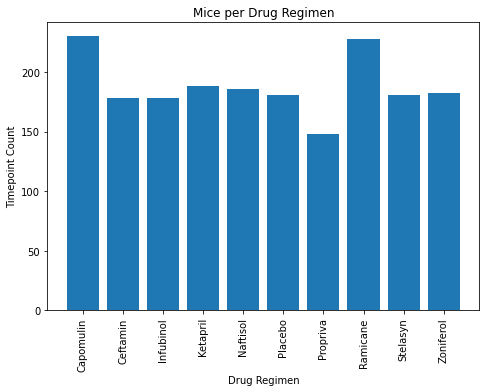

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Mice per Drug Regimen')
ax.set_ylabel('Timepoint Count')
ax.set_xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
ax.bar(x_axis, y_axis)



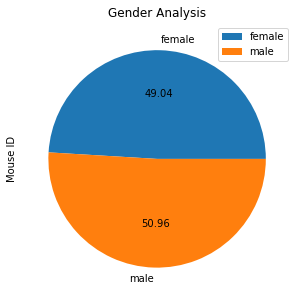

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df.groupby('Sex').count()).reset_index()
gender_df.plot.pie(y='Mouse ID', figsize=(5,5), title='Gender Analysis',
                    labels=['female', 'male'], autopct='%.2f')


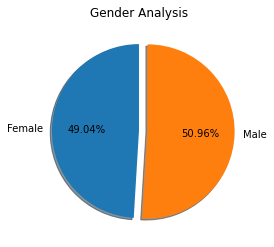

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = gender_df['Mouse ID']
labels = 'Female', 'Male'
explode = (0,.1)
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=labels, autopct='%1.2f%%', explode=explode, shadow=True,
            startangle=90)
plt.title("Gender Analysis")
plt.show()



## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Timepoint'].max())
final_df = final_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]


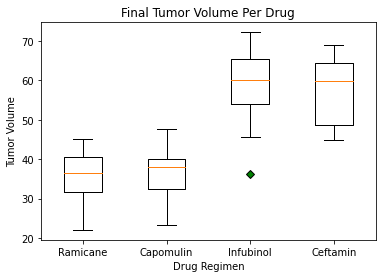

In [63]:
# # Put treatments into a list for for loop (and later for plot labels)
labels = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
#QQIRQ ={'Name':[], 'Q1': [], 'Q3':[], 'IQR':[]}
outliers_list = []
df_vol_list = []
for label in labels:
    merge_back_df = label + "_max_df"
    temp = clean_df.loc[clean_df['Drug Regimen'] == label,:]
    temp_max_df = pd.DataFrame(temp.groupby(['Mouse ID']).max()['Timepoint'])
    merge_back_df = pd.merge(temp_max_df, clean_df,how='inner', on=['Mouse ID', 'Timepoint'])
    df_vol_list.append(merge_back_df['Tumor Volume (mm3)'])
    outliers_list.append({'name': label,
                        'Q1': merge_back_df['Tumor Volume (mm3)'].quantile(.25),
                        'Q3': merge_back_df['Tumor Volume (mm3)'].quantile(.75),
                        'IRQ': (merge_back_df['Tumor Volume (mm3)'].quantile(.75) - merge_back_df['Tumor Volume (mm3)'].quantile(.25))})


green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume Per Drug')
ax.set_ylabel('Tumor Volume')
ax.set_xlabel('Drug Regimen')
ax.set_xticklabels(labels)
ax = ax.boxplot(df_vol_list, flierprops=green_diamond)



# Calculate the IQR and quantitatively determine if there are any potential outliers.

In [64]:
outliers_list
for meds in outliers_list:
    print(f"{meds['name']} has potential outliers if they are below {meds['Q1']} or above {meds['Q3']} and has an IRQ of {meds['IRQ']}\n" +
            f"{meds['name']} would have an lower bound of {meds['Q1'] - meds['IRQ']*1.5} and an upper bound of {meds['Q3'] + meds['IRQ']*1.5}. and outliers would be \n" +
            "outside this range\n" )

Ramicane has potential outliers if they are below 31.56046955 or above 40.65900627 and has an IRQ of 9.098536719999998
Ramicane would have an lower bound of 17.912664470000003 and an upper bound of 54.30681135. and outliers would be 
outside this range

Capomulin has potential outliers if they are below 32.37735684 or above 40.1592203 and has an IRQ of 7.781863460000004
Capomulin would have an lower bound of 20.70456164999999 and an upper bound of 51.83201549. and outliers would be 
outside this range

Infubinol has potential outliers if they are below 54.04860769 or above 65.52574285 and has an IRQ of 11.477135160000003
Infubinol would have an lower bound of 36.83290494999999 and an upper bound of 82.74144559000001. and outliers would be 
outside this range

Ceftamin has potential outliers if they are below 48.72207785 or above 64.29983003 and has an IRQ of 15.577752179999997
Ceftamin would have an lower bound of 25.355449580000002 and an upper bound of 87.66645829999999. and outliers

## Line and Scatter Plots

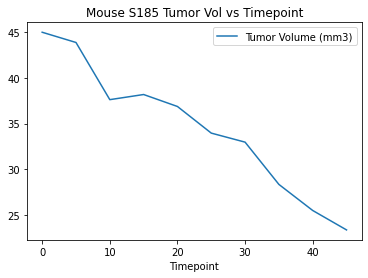

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capom_df = clean_df.set_index('Drug Regimen')
capom_df = capom_df.loc['Capomulin']
capom_df = clean_df.set_index('Mouse ID')
capom_df = capom_df.loc['s185']
capom_df.reset_index()
capom_df.plot.line('Timepoint', 'Tumor Volume (mm3)', title='Mouse S185 Tumor Vol vs Timepoint')


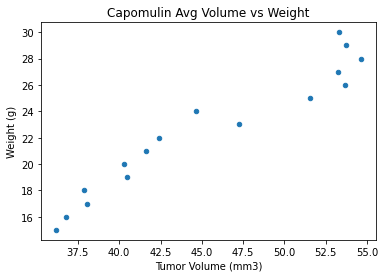

In [66]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capom_df = clean_df.set_index('Drug Regimen')
capom_df = capom_df.loc['Capomulin']
capom_dfg = pd.DataFrame(clean_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()).reset_index()
ax1 = capom_dfg.plot.scatter('Tumor Volume (mm3)', 'Weight (g)', title='Capomulin Avg Volume vs Weight')

## Correlation and Regression

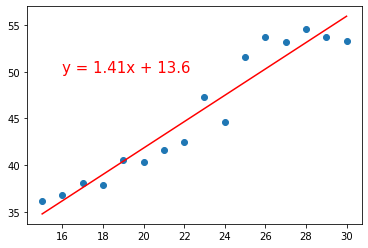

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_values = capom_dfg['Tumor Volume (mm3)']
x_values = capom_dfg ['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(title='test')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,50),fontsize=15,color="red")
plt.show()
